## A quick intro to SciPy

NumPy contains much of the functionality required to perform efficient operations in python, but you will soon realize that there is not a great deal of high level functionality implemented in numpy. 

[Scipy](http://docs.scipy.org/doc/scipy/reference/) is the module where you *will* find a great deal of high level functionality that is very useful for day to day scientific computing. 

Some of the very useful submodules that can be found in SciPy are:

* [Linear Algebra](http://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html)
* [Statistics](http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html)
* [Integration](http://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html)
* [Interpolation](http://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html)
* [FFT](http://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html)
* [Optimization](http://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)

For the rest of this notebook we will play around with some of these submodules to see what kind of functionality is available.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### SciPy constants

`scipy.constants` is a convenient compilation of the [2010 CODATA constants](http://www.codata.org).

In [ ]:
from scipy import constants as cons
cons.physical_constants

In [ ]:
cons.find('electron mass')

### Linear Algebra
Scipy has implemented most of the fundamental linear algibra operations that you will need to use.

In [ ]:
from scipy import linalg
#matrix inverse
x = np.random.rand(10,10)
xinv = linalg.inv(x)

#eigenvalues, eigenvectors
eigenval, eigenvec = linalg.eig(x)

#determinant
det = linalg.det(x)

#and many more...

We'll start with a simple linear system. Scipy has a great many useful linear algebra functions, including inverses, determinants, and eigenvalues! We can showcase some of these with a dummy matrix. 

In [ ]:
A = np.eye(4)
A[1,2] = 3 # just to keep it interesting
print(A)

In [ ]:
print(linalg.inv(A), linalg.det(A), linalg.eigvals(A))

We will focus on the linear least squares solver in scipy. As earlier today, we use linear least squares which finds the solution $\hat{x}$ to the system

$$ \mathbf{A}x = \mathbf{b} $$ 

that minimizes the squared absolute error. 

$$ \left\lVert \mathbf{A}x - b \right \rVert^2 $$

In the special case that your data satisfies the [Gauss-Markov Theroem](https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem) the linear least squares solution will give the optimal unbiased estimator $\hat{x}$. Let's generate some data with a linear model and try it out. 

In [ ]:
true_m, true_b = 0.68, 2.38
N = 100
x = np.linspace(0,50,N)

def linear_func(x, m=true_m, b=true_b):
    return m*x+b

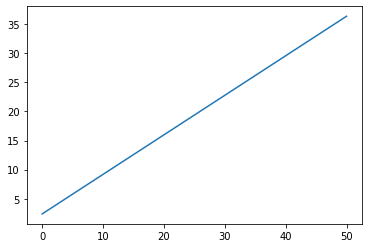

In [ ]:
true_linear_y = linear_func(x)
plt.plot(x, true_linear_y)
plt.show()

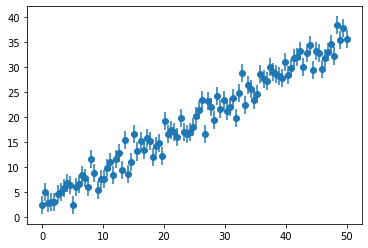

In [ ]:
# add noise
sigma = 1.8
obs_linear_y = true_linear_y+ np.random.randn(N)*sigma
plt.errorbar(x, obs_linear_y, yerr = np.ones(N)*sigma,marker='o', ls='None')
plt.show()

In [ ]:
from scipy.stats import linregress
from scipy.linalg import lstsq

fit_m, fit_b, r,p, std_err = linregress(x, obs_linear_y)
print('R^2 = ',r**2)
print('Fit:', fit_m, fit_b)
print('Truth:', true_m, true_b)

R^2 =  0.9644965140348956
Fit: 0.6696283742128247 2.561375950771037
Truth: 0.68 2.38


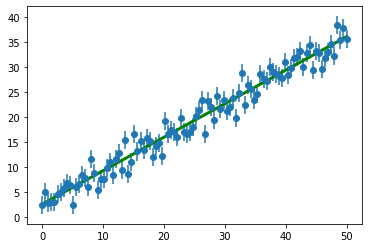

In [ ]:
plt.errorbar(x, obs_linear_y, yerr = np.ones(N)*sigma,marker='o', ls='None')
plt.plot(x, fit_m*x+fit_b, color = 'g', lw = 3)
plt.show()

I actually used `scipy.stats`'s `linregress` module here instead of `lstsq`. That will give us the same answer, but with a few extra steps.  

In [ ]:
A = np.ones((N,2))
A[:,1] = x #build a design matrix

(fit_b2, fit_m2), _,_,_ = lstsq(A, obs_linear_y)
print(fit_m2, fit_b2)

0.6696283742128251 2.5613759507710347


Why the extra steps? Well, that's because **linear least squares is not just for fitting lines**! Any linear model can be fit with linear least squares. Let's try that for our next excercise! 

### Optimization

Yes, you can fit non-linear functions!

In [ ]:
from scipy import optimize

In [ ]:
#function to fit must have independent variable as first arg, parameters after that
def func(x, p0, p1, p2):
    
    return p0 + x*p1 + x**2*p2
        

In [ ]:
#Generate some data
x = np.linspace(0, 10, 20)
p = np.random.randn(3)
y = func(x, *p) + np.random.randn(20)

In [ ]:
fp, cov = optimize.curve_fit(func, x, y)
print('Original parameters: {0}'.format(p))
print('Fitted parameters: {0}'.format(fp))
plt.matshow(cov)
plt.colorbar()

In [ ]:
plt.plot(x, y, 'd')
plt.plot(x, func(x,*fp))

### Interpolation

In [ ]:
from scipy.interpolate import interp1d, UnivariateSpline
# now interpolate onto a much finer grid, using both iterp1d and UnivariateSpline
ix = np.linspace(0, 10, 200)

# list of interpolated values of location at i_times
i1d = interp1d(x, y, kind="cubic")
us = UnivariateSpline(x, y) # a function that will return interpolated values

In [ ]:
plt.plot(x, y, 'd')
plt.plot(ix, i1d(ix), label='interp1d')
plt.plot(ix, us(ix), label='UnivariateSpline')
plt.legend()

### Exercise 1

Explore 2 dimensional interpolation using interpolate.bisplrep and interpolate.bisplev on the following array. Interpolate the below array to 10 times it's fineness.

In [ ]:
x, y = np.mgrid[-1:1:20j, -1:1:20j]
z = (x+y) * np.exp(-6.0*(x*x+y*y))

In [ ]:
plt.matshow(z)

### Integration

In [ ]:
from scipy.integrate import quad

In [ ]:
f = lambda x : func(x, p[0], p[1], p[2])
di = quad(f, 10, 20)

In [ ]:
print('Definite integral, error : {0}, {1}'.format(di[0], di[1]))

In [ ]:
from scipy.integrate import ode
ode?

You can [detect gravitational waves](https://losc.ligo.org/s/events/GW150914/GW150914_tutorial.html) with SciPy! 

## Exercise Solution

### Exercise 1

In [ ]:
from scipy import interpolate
xnew, ynew = np.mgrid[-1:1:70j, -1:1:70j]
tck = interpolate.bisplrep(x, y, z, s=0)
znew = interpolate.bisplev(xnew[:,0], ynew[0,:], tck)
plt.matshow(znew)

### Exercise 2

In [ ]:
params = {'n_neighbors':range(1,5), 'weights':['uniform', 'distance']}
cvreg = grid_search.GridSearchCV(neighbors.KNeighborsRegressor(), params, n_jobs=-1)#n_jobs parameter sets the number of processors
cvreg.fit(X_train, Y_train)

Y_pred = cvreg.predict(X_test)

# how well did we do?
mse = metrics.mean_squared_error(Y_test,Y_pred)
print(mse)
plot(Y_test,Y_pred - Y_test,'o')
xlabel("True Median House Price ($1,000)")
ylabel("Residual")
hlines(0,min(Y_test),max(Y_test),color="red")